## Project Goal
The goal of this exercise is to analyze a dataset consisting of information from 400 credit card holders and predict the average credit card balance of a given individual. Such an exercise could be conducted as part of a customer analysis within a credit card company. The results of the analysis could determine which customers present a risk of credit default, or what the expected consumer behavior of prospective customers will be. 

Dataset : "Credit.csv"




### Dataset description
The dataset has 400 observations with the following variables:
- ID : Identification
- Income : Income in \\$1,00,000
- Limit : credit limit
- Rating : credit rating
- Cards : number of cards
- Age : age in years
- Education : number of years of education
- Gender : Male or Female
- Student : Yes or No
- Married : Yes or No
- Ethnicity : African American, Asian or Caucasian
- Balance : average monthly credit card balance across all cards owned by the customer in $



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')

#### Load and visualize the dataset.

In [7]:
data_df = pd.read_csv('Credit.csv')
data_df.head(10)

,Unnamed: 0,ID,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,1,1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,2,2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,3,3,104.593,7075,514,4,71,11,Male,No,No,Asian,580
3,4,4,148.924,9504,681,3,36,11,Female,No,No,Asian,964
4,5,5,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331
5,6,6,80.180,8047,569,4,77,10,Male,No,No,Caucasian,1151
6,7,7,20.996,3388,259,2,37,12,Female,No,No,African American,203
7,8,8,71.408,7114,512,2,87,9,Male,No,No,Asian,872
8,9,9,15.125,3300,266,5,66,13,Female,No,No,Caucasian,279
9,10,10,71.061,6819,491,3,41,19,Female,Yes,Yes,African American,1350


In [8]:
# features available
data_df.columns

Index(['Unnamed: 0', 'ID', 'Income', 'Limit', 'Rating', 'Cards', 'Age',
       'Education', 'Gender', 'Student', 'Married', 'Ethnicity', 'Balance'],
      dtype='object')

In [9]:
# removing unnecessary columns
data_df = data_df.drop(['Unnamed: 0','ID'], axis = 1)
data_df.head()

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,104.593,7075,514,4,71,11,Male,No,No,Asian,580
3,148.924,9504,681,3,36,11,Female,No,No,Asian,964
4,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


In [10]:
# to check for info about features
data_df.info()
# No missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
Income       400 non-null float64
Limit        400 non-null int64
Rating       400 non-null int64
Cards        400 non-null int64
Age          400 non-null int64
Education    400 non-null int64
Gender       400 non-null object
Student      400 non-null object
Married      400 non-null object
Ethnicity    400 non-null object
Balance      400 non-null int64
dtypes: float64(1), int64(6), object(4)
memory usage: 34.5+ KB


In [11]:
# getting the statisics of numeric features
data_df.describe()

,Income,Limit,Rating,Cards,Age,Education,Balance
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,45.218885,4735.600000,354.940000,2.957500,55.667500,13.450000,520.015000
std,35.244273,2308.198848,154.724143,1.371275,17.249807,3.125207,459.758877
min,10.354000,855.000000,93.000000,1.000000,23.000000,5.000000,0.000000
25%,21.007250,3088.000000,247.250000,2.000000,41.750000,11.000000,68.750000
50%,33.115500,4622.500000,344.000000,3.000000,56.000000,14.000000,459.500000
75%,57.470750,5872.750000,437.250000,4.000000,70.000000,16.000000,863.000000
max,186.634000,13913.000000,982.000000,9.000000,98.000000,20.000000,1999.000000


In [12]:
# getting the statisics of categorical features
data_df.describe(include = [np.object])

,Gender,Student,Married,Ethnicity
count,400,400,400,400
unique,2,2,2,3
top,Female,No,Yes,Caucasian
freq,207,360,245,199


# VISUALIZING THE DATASET

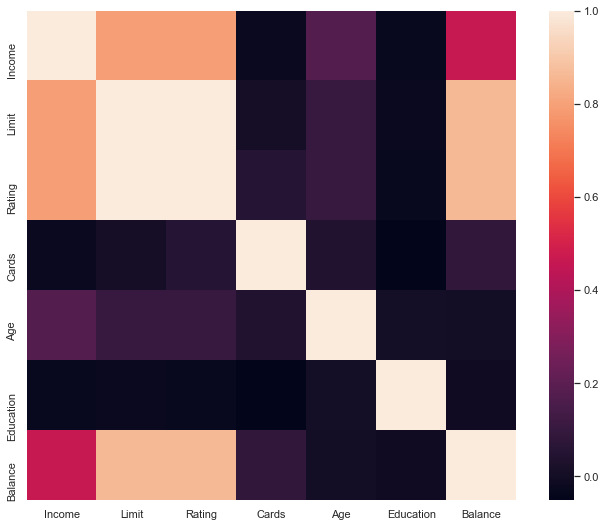

In [26]:
# visualizing the correlation matrix using heatmap
corrmat = data_df.corr()
f, ax = plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=1, square=True)

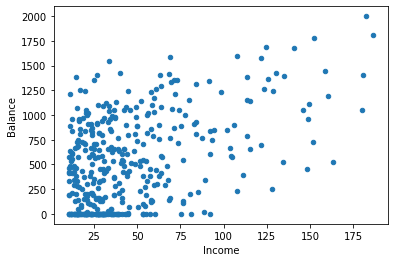

In [14]:
# scatterplot of Balance vs Income
var = 'Income'
data = pd.concat([data_df['Balance'], data_df[var]], axis=1)
data.plot.scatter(x=var, y='Balance');

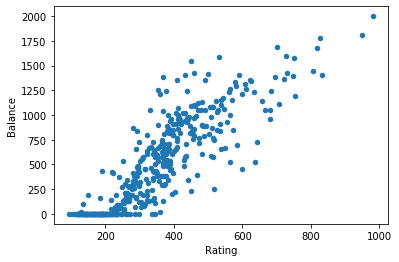

In [15]:
# scatterplot of Balance vs Income
var = 'Rating'
data = pd.concat([data_df['Balance'], data_df[var]], axis=1)
data.plot.scatter(x=var, y='Balance');

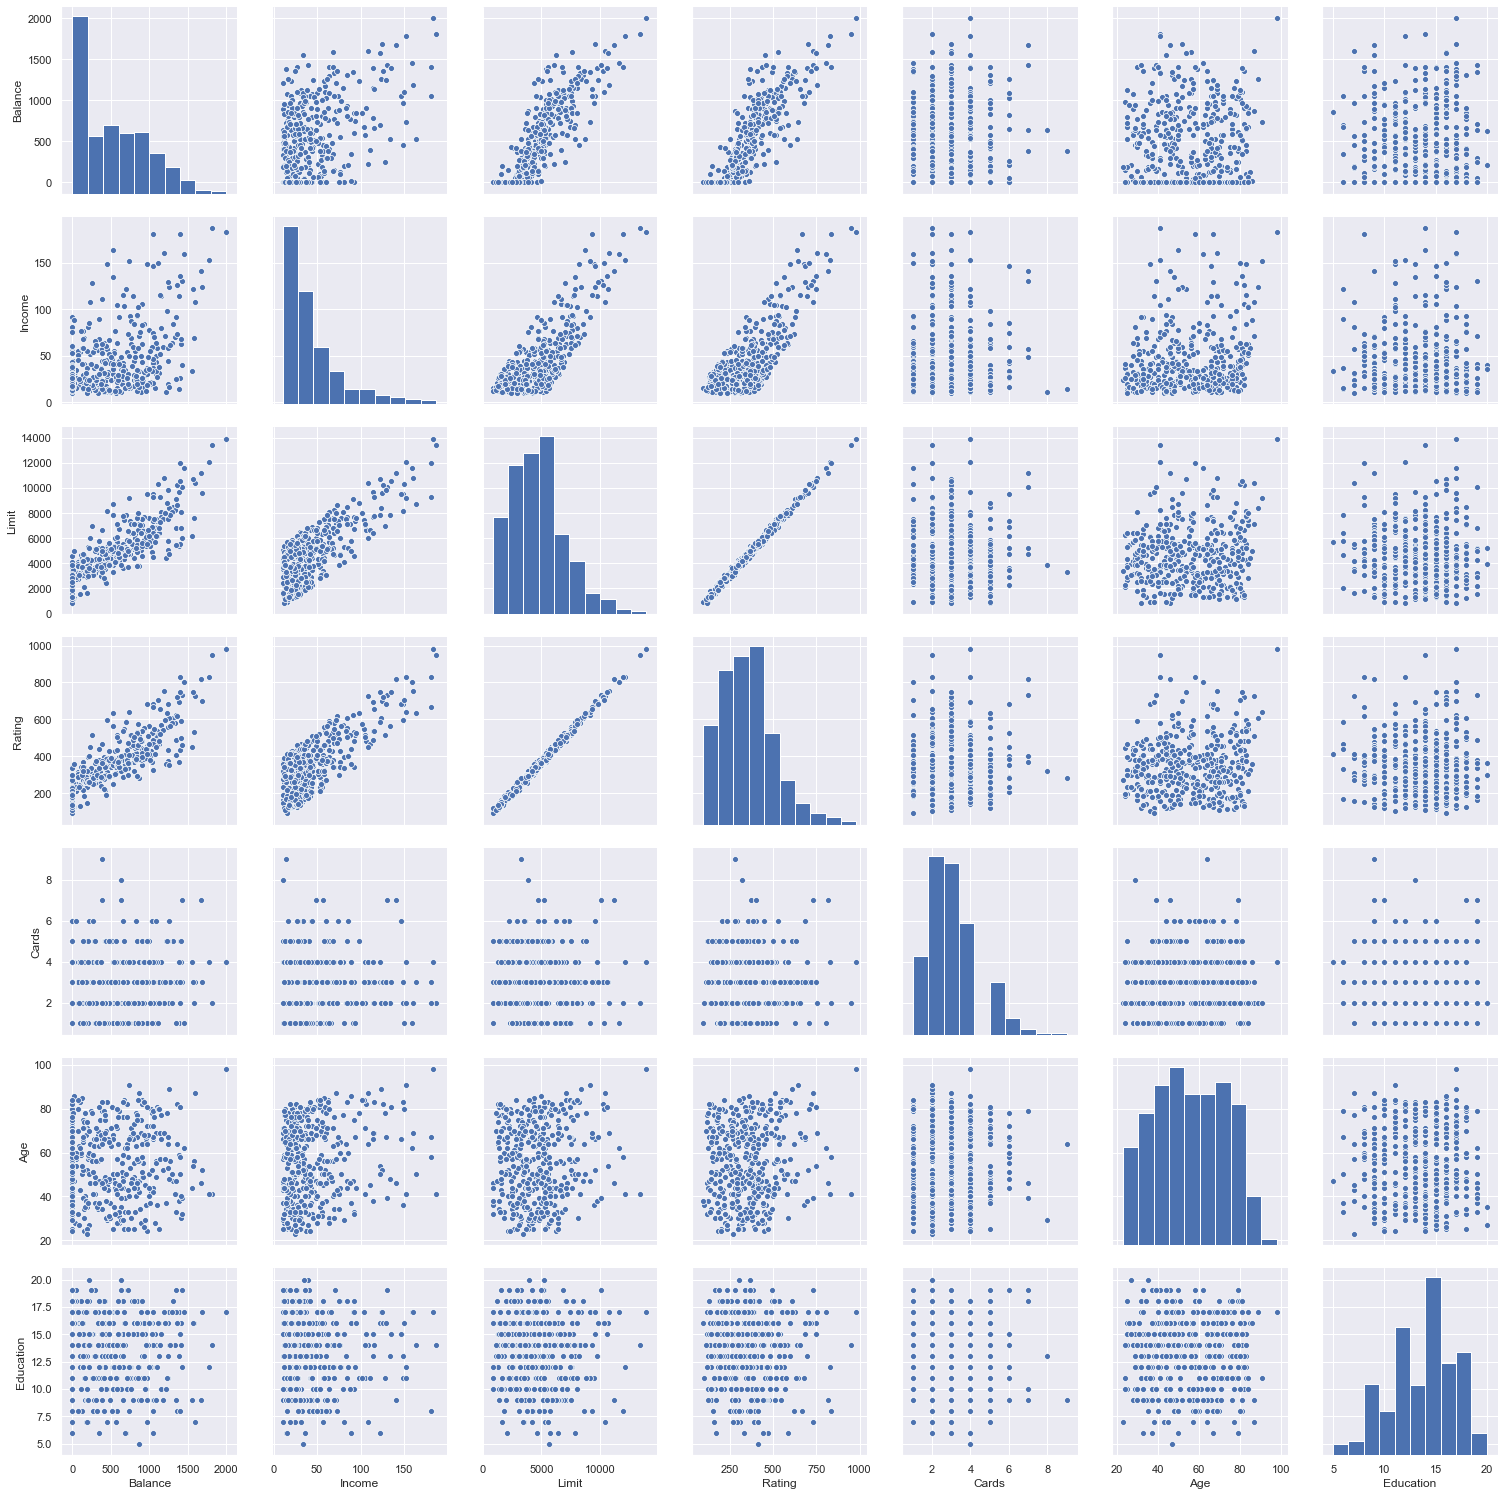

In [16]:
# scatterplots between 'SalePrice' and correlated variables..
sns.set()
cols = ['Balance', 'Income','Limit', 'Rating','Cards','Age','Education']
sns.pairplot(data_df[cols], size=3.0)
plt.show()

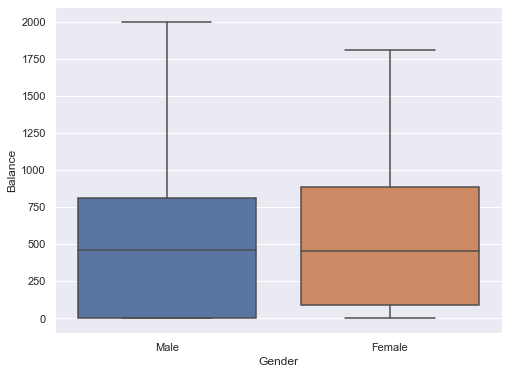

In [17]:
# box-plot Gender/Balance
var1 = 'Balance'
var = 'Gender'
data = pd.concat([data_df[var1], data_df[var]], axis=1)
f, ax = plt.subplots(figsize=(8,6))
fig = sns.boxplot(x=var, y=var1, data=data)

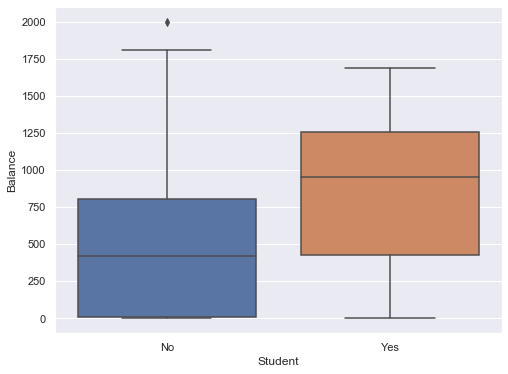

In [18]:
# box-plot Gender/Balance
var1 = 'Balance'
var = 'Student'
data = pd.concat([data_df[var1], data_df[var]], axis=1)
f, ax = plt.subplots(figsize=(8,6))
fig = sns.boxplot(x=var, y=var1, data=data)

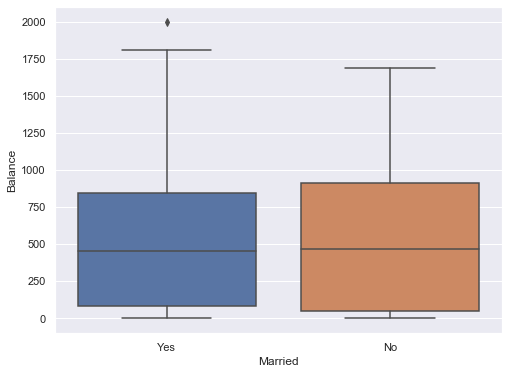

In [19]:
# box-plot Gender/Balance
var1 = 'Balance'
var = 'Married'
data = pd.concat([data_df[var1], data_df[var]], axis=1)
f, ax = plt.subplots(figsize=(8,6))
fig = sns.boxplot(x=var, y=var1, data=data)

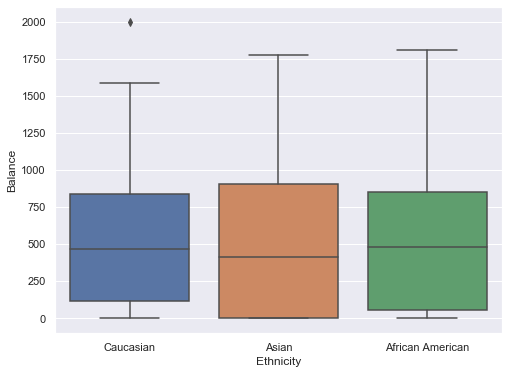

In [20]:
# box-plot Gender/Balance
var1 = 'Balance'
var = 'Ethnicity'
data = pd.concat([data_df[var1], data_df[var]], axis=1)
f, ax = plt.subplots(figsize=(8,6))
fig = sns.boxplot(x=var, y=var1, data=data)

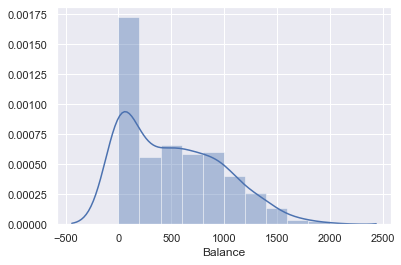

In [23]:
# visualization of the distribution of Balance variable--
sns.distplot(data_df['Balance']);
# sns.distplot(np.log1p(data_df['Balance']));

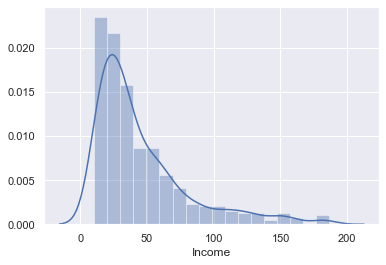

In [25]:
# visualization of the distribution of Income variable--
sns.distplot(data_df['Income']);
# sns.distplot(np.log1p(data_df['Income']));

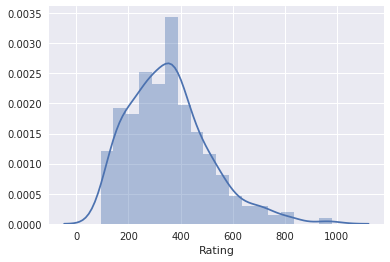

In [26]:
# visualization of the distribution of Income variable--
sns.distplot(data_df['Rating']);
# sns.distplot(np.log1p(data_df['Rating']));

# OBSERVATION

#### Explore various encoding methodologies for categorical variables. (One-Hot and Binary encoding).

In [9]:
X_df = data_df.drop(['Balance'], axis = 1)
Y_df = data_df['Balance']
# performing one hot encoding for all the categorical variables
X_df = pd.get_dummies(data = X_df)
X_df.head()

,Income,Limit,Rating,Cards,Age,Education,Gender_Female,Gender_Male,Student_No,Student_Yes,Married_No,Married_Yes,Ethnicity_African American,Ethnicity_Asian,Ethnicity_Caucasian
0,14.891,3606,283,2,34,11,0,1,1,0,0,1,0,0,1
1,106.025,6645,483,3,82,15,1,0,0,1,0,1,0,1,0
2,104.593,7075,514,4,71,11,0,1,1,0,1,0,0,1,0
3,148.924,9504,681,3,36,11,1,0,1,0,1,0,0,1,0
4,55.882,4897,357,2,68,16,0,1,1,0,0,1,0,0,1


#### Center and standardize the data.
- Why is centering (zero mean) and standardizing (unit variance) of data necessary? 
- Are the ridge regression and standard least squares coefficient estimates scale invariant? Here scale invariance implies that multiplying a predictor by a constant $c$   leads to scaling of coefficient estimates by a factor of 1/ $c$ . 

In [10]:
# Standardizing the features and not the Dependent variable
X_numeric = X_df[['Income', 'Limit', 'Rating', 'Cards', 'Age', 'Education']]
sc = StandardScaler()
X_numeric_std = sc.fit_transform(X_numeric)

#### Split dataset into training and validation set (80:20)

In [28]:
X_train_std, X_test_std, Y_train, Y_test = train_test_split(X_df_std, Y_df, test_size = 0.20, random_state = 0)
print('The dimension of the original dataset is', X_df_std.shape)
print("The dimension of the training data is: ", X_train_std.shape)
print("The dimension of the test data is: ", X_test_std.shape)

NameError: name 'X_df_std' is not defined

#### Use linear regression. 
- Report training and validation error. 

In [27]:
lr = LinearRegression()
fit = lr.fit(X_train_std, Y_train)

# calculating Training Error
y_pred_train = lr.predict(X_train_std)
mse_train = mean_squared_error(Y_train, y_pred_train)

# Calculating test error
y_pred_test = lr.predict(X_test_std)
mse_test = mean_squared_error(Y_test, y_pred_test)

print("The training error is: {}\n ".format(mse_train))
print("The Validation error is: {}".format(mse_test))

NameError: name 'X_train_std' is not defined

#### Use ridge regression for different values of the penalty coefficient $\lambda$
- Plot training and validation error vs $\lambda$. Compare with least squares regression on the same graph.
- Plot all coefficients of the model vs $\lambda$ on the same graph.
- Use k-fold cross validation / grid search to find optimal value for the hyperparameter $\lambda$. (You can use scikit-learn)

In [ ]:
lamda_rng = 

####   Use lasso regression for different values of the penalty coefficient $\lambda$
- Plot training and validation error vs $\lambda$. Compare with least squares regression on the same graph.
- Plot all coefficients of the model vs $\lambda$ on the same graph.
- Use k-fold cross validation / grid search to find optimal value for the hyperparameter $\lambda$. (You can use scikit-learn)

#### Observations and Inferences:
- Observe and explain the difference in the behaviour of lasso and ridge coefficients as $\lambda$ increases.
- Briefly explain which of Lasso and Ridge regression would perform better in terms of validation error and the interpretability of developed models in the the following cases:
    - The output response is related to almost all predictors.
    - The output response is only related to let's say, 6 out of 40 predictors.
- List out the features selected by Lasso regression for the optimal value of $\lambda$.

#### Bonus (Optional) : 
- Try out Best Subset Selection, Forward Stepwise Selection, Backward Stepwise Selection and Recursive Feature Elimination for feature selection. Compare the selected features, validation error and computational complexity for the above with Lasso/Ridge regression.
- Use elastic net regression and compare validation error with ridge and lasso regession.